In [18]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import face
import sys
import cv2
import PIL

In [19]:
input_file = 'palm.jpg'
img= cv2.imread(input_file)
h,w,c = img.shape
#while (h>400 or w > 400):
 #   img = cv2.resize(img, dsize=(w//2, h//2), interpolation=cv2.INTER_CUBIC)
  #  h,w,c = img.shape


In [20]:
import sys
import cv2 as cv

    
src = img
# Check if image is loaded fine


scale = 1
delta = 0   
ddepth = cv.CV_16S
    
src = cv.GaussianBlur(src, (5, 5), 0)
    
    
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    
    
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
    
    
grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    
cv.imwrite('sobel.jpg', grad)     
cv.imshow('ancd', grad)
cv.waitKey(0)
    


-1

In [13]:
print(grad.shape)
H=grad.shape[0]
W=grad.shape[1]
print(H)

(414, 621)
414


In [14]:
def objective_function(b):
    sky=[]
    gnd=[]
    if(sum(b)==(H-1)*(W)):
        return 0        
    for i in range(W):
        for j in range(0,b[i]+1):
            sky.append(img[j,i])
        for j in range(b[i]+1,H):
            gnd.append(img[j,i])    

    sky = np.transpose(sky)
    gnd = np.transpose(gnd)
    #print(sky)
    #print(gnd)
    co_s = np.cov(sky)
    co_g = np.cov(gnd)
    #print(co_g)
    co_sD = np.linalg.det(co_s)
    co_gD = np.linalg.det(co_g)
    eig_s, _ = np.linalg.eig(co_s)
    eig_g, _ = np.linalg.eig(co_g)
    J = 1/(2*co_sD + co_gD + (2*eig_s[0]) + (eig_g[0]))
    return J       

In [15]:
def calculate_border(grad,t):
    
    b = [None] * W
    
    for x in range(W):
        b[x]=H-1
        for y in range(H):
            if(grad[y][x]>t):
                b[x]=y
                break
    return b
                
            

In [16]:
thresh_min=40
thresh_max=260
search_step=5
n=int((thresh_max-thresh_min)/search_step + 1)
j_n_max=0
for k in range(1,n+1):
    print(k)
    t=thresh_min+((thresh_max-thresh_min)/n-1)*(k-1)
    b_temp=calculate_border(grad,t)   
    j_n_temp=objective_function(b_temp)
    if j_n_temp>j_n_max:
        j_n_max=j_n_temp
        b_opt=b_temp
print(b_opt)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
[282, 278, 277, 277, 260, 260, 281, 282, 289, 326, 283, 214, 285, 286, 287, 287, 277, 277, 286, 273, 269, 272, 272, 271, 272, 259, 259, 237, 258, 239, 239, 238, 257, 184, 277, 289, 288, 292, 292, 293, 293, 263, 263, 257, 257, 257, 257, 257, 309, 256, 255, 256, 255, 256, 263, 262, 293, 235, 235, 235, 235, 237, 234, 183, 238, 291, 271, 189, 189, 189, 188, 188, 188, 244, 248, 249, 264, 265, 249, 182, 240, 239, 239, 182, 239, 239, 239, 239, 239, 239, 239, 239, 241, 245, 245, 245, 245, 226, 245, 245, 245, 245, 253, 260, 259, 259, 248, 248, 249, 257, 257, 259, 223, 222, 222, 237, 242, 245, 272, 230, 243, 219, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 218, 224, 323, 287, 278, 278, 278, 241, 240, 228, 238, 254, 256, 244, 244, 251, 301, 243, 250, 255, 255, 255, 255, 255, 255, 255, 241, 241, 241, 241, 241, 241, 185, 184, 184, 184, 184, 184, 184, 184, 184

In [17]:
#temp_code
lowest_pixel=[]
arr=img
for i in range(W):
        for j in range(0,b_opt[i]+1):
            arr[j][i]=255
        for j in range(b_opt[i]+1,H):
            arr[j][i]=0 


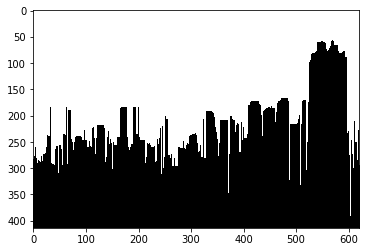

In [18]:
imgplot = plt.imshow(arr,cmap='gray')
plt.show()

In [334]:
cv2.imwrite(input_file[:-4]+str('_out_2.jpg'), arr) 

True